# Assignment 7
## Week 7

### Question 1

Enter the polynomial in one variable:  x**2 + np.sin(8*x)
Enter the starting point:  1
Enter the temperature:  3
Enter the decay rate:  0.95


MovieWriter ffmpeg unavailable; using Pillow instead.


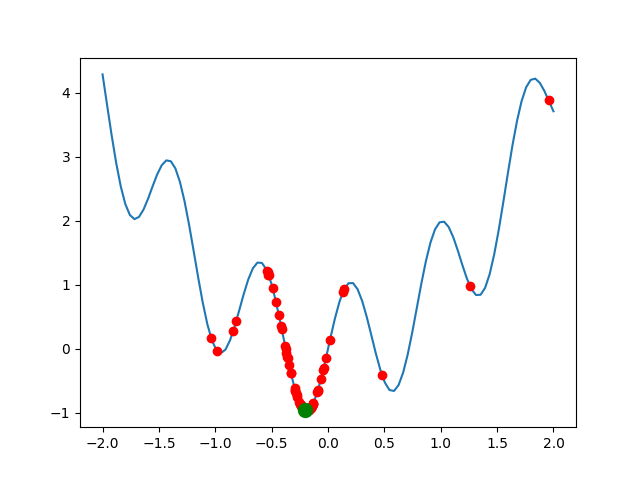

In [8]:
%matplotlib ipympl
import math
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def q1(func, start, temp, decayrate):
    def yfunc(x):
        return func(x)

    xbase = np.linspace(-2, +2, 100)
    ybase = yfunc(xbase)

    T = temp
    bestcost = 100000
    bestx = start
    rangemin, rangemax = -2, +2 
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    def onestep(frame):
        nonlocal bestcost, bestx, decayrate, T, xall, yall
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        y = yfunc(x)
        if y < bestcost:
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        return lnall, lngood,

    ani = FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False, blit=True)
    ani.save('1.png')
    plt.show()
eq = input("Enter the polynomial in one variable: ")
func = lambda x: eval(eq)
start = int(input("Enter the starting point: "))
temp = int(input("Enter the temperature: "))
decayrate = float(input("Enter the decay rate: "))
              
q1(func, start, temp, decayrate)

### Explanation
- I have put the code given by sir in a function and gave the requied inputs
- In this code it plots from -2 to +2 and finds a minimum in this region

### Question 2

Shortest route: [0, 5, 4, 3, 1, 7, 9, 8, 2, 6, 0]
Total distance: 34.43384302733041


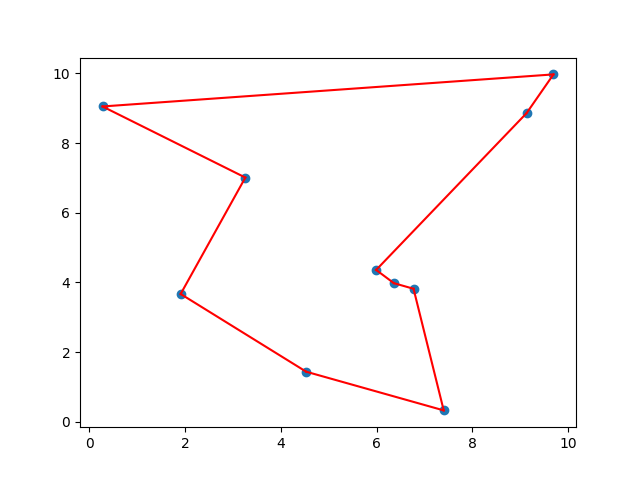

In [6]:
with open('tsp_10.txt') as f:
    n = int(f.readline())
    cities = [tuple(map(float, f.readline().split())) for _ in range(n)]
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
def nearest_city(start_city, cities):
    route = [start_city]
    pending = set(range(len(cities)))
    pending.remove(start_city)
    while pending:
        next_city = min(pending, key=lambda city: distance(cities[route[-1]], cities[city]))
        route.append(next_city)
        pending.remove(next_city)
    return route
plt.figure()
def plot_route(route, cities):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    plt.plot(x, y, 'o')
    for i in range(len(route)-1):
        plt.plot([cities[route[i]][0], cities[route[i+1]][0]], [cities[route[i]][1], cities[route[i+1]][1]], 'r-')
    plt.show()

start_city = 0 
route = nearest_city(start_city, cities)
route.append(start_city) 

total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))

print("Shortest route:", route)
print("Total distance:", total_distance)
plot_route(route, cities)

Shortest route: [0, 34, 95, 63, 38, 57, 12, 72, 92, 87, 45, 47, 68, 51, 49, 48, 75, 58, 46, 82, 98, 62, 33, 32, 79, 70, 1, 81, 44, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 53, 97, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 25, 86, 30, 19, 6, 76, 16, 88, 17, 41, 4, 89, 2, 5, 26, 8, 23, 13, 85, 10, 67, 78, 35, 77, 69, 43, 94, 24, 74, 40, 60, 61, 56, 0]
Total distance: 90.28052234607274


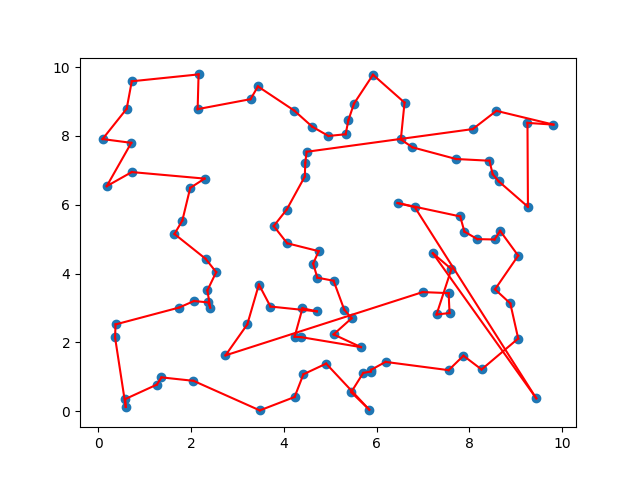

In [7]:
with open('tsp_100.txt') as f:
    n = int(f.readline())
    cities = [tuple(map(float, f.readline().split())) for _ in range(n)]
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
def nearest_city(start_city, cities):
    route = [start_city]
    pending = set(range(len(cities)))
    pending.remove(start_city)
    while pending:
        next_city = min(pending, key=lambda city: distance(cities[route[-1]], cities[city]))
        route.append(next_city)
        pending.remove(next_city)
    return route
plt.figure()
def plot_route(route, cities):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    plt.plot(x, y, 'o')
    for i in range(len(route)-1):
        plt.plot([cities[route[i]][0], cities[route[i+1]][0]], [cities[route[i]][1], cities[route[i+1]][1]], 'r-')
    plt.show()

start_city = 0 
route = nearest_city(start_city, cities)
route.append(start_city) 

total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))

print("Shortest route:", route)
print("Total distance:", total_distance)
plot_route(route, cities)

### Explanation:
- I have put the x and y coordinates in cities
- I have written a function to calculate the distance between two points(cities)
- My process is starting with a city and going to another city.the selection process of another city is in the way that it is nearest to the current city.In this way I will cover all the cities
- the nearest city function takes a city and makes a pending list that contains all uncoverd cities 
- After that it finds min distance from all cities and that is the next city . this next city is removed from pending list and this is added to route
- when all cities are completed then the pending list is now empty and we add the initial city as to complete the visit
- then we sum the distances of each point in route to find overall distance